# 5 Minute Tutorial 

## Using the ArcGIS API for Python to Accessing Content

ArcGIS Online and Enterprise provide a wealth of publicly and privately shared information.  The ArcGIS API for Python can easily find and use content of the various types.

### Setup the Environment

We will begin by putting are imports at the top of the notebook

In [2]:
from arcgis.gis import GIS

### Connect to the `GIS`

Content can be explored as an anonymous user and/or as an authenticated user.

- Anonymous users can only access public data
- Authenticated data can access organizational data, your private data, or shared data to your username

In [3]:
gis = GIS() 

### The Content Manager

<img src="./img/content_manager.jpg" width=300/>

#### What is the Content Manager?

The `ContentManager` class allows for the following:

- Search for content
- Add, update and delete content
- Share/Unshare Content
- Create/Delete folders
- Replace vector tile services

#### Using the Content Manager

- It is a property off of the GIS class
- The content manager follows a common pattern:
    + `get` method - retrieves an item by ID
    + `search` method - finds item by keywords
    + `add` method - uploads new content to the site

In [8]:
gis.content

##### Searching

- returns a list of `Item` classes

In [11]:
gis.content.search(query="concert",
                   item_type="Feature Layer",
                   sort_field='avgRating',
                   sort_order='asc',
                   max_items=20)

[<Item title:"Donnees_Begraisiere" type:Feature Layer Collection owner:Lemonnier>,
 <Item title:"Concert_Halls_in_Michigan's_Lower_Peninsula" type:Feature Layer Collection owner:10287@sjs>,
 <Item title:"USFSTrails" type:Feature Layer Collection owner:seggebraten_EsriSF>,
 <Item title:"Generate_tessellations_on_Number_of_concerts_per_venues" type:Feature Layer Collection owner:dkiman_wesleyan>,
 <Item title:"concerts" type:Feature Layer Collection owner:wpaGIS>,
 <Item title:"Kpop_winter_concerts" type:Feature Layer Collection owner:eyl13_georgetownuniv>,
 <Item title:"AGGLO - INSTALLATIONS COMMERCIALES A FORTE FREQUENTATION (ICFF)" type:Feature Layer Collection owner:sitg>,
 <Item title:"Fire Stations" type:Feature Layer Collection owner:Alex.Quintero@doerer.us_NIR>,
 <Item title:"Conservation de la Nature Canada_WFL1" type:Feature Layer Collection owner:Geo_ECL>,
 <Item title:"All_Law_Enforcement_shp" type:Feature Layer Collection owner:jbostic_alhub>,
 <Item title:"Concert2020" type

##### Retrieving a Single Item

- if you know what you want, use the Item Id to Get it.

In [16]:
gis.content.get('5ae9e138a17842688b0b79283a4353f6')

<Item title:"Ocean Basemap" type:Web Map owner:esri>

##### Using Advanced Search

- Sometimes the basic search does not suite the needs.  `advanced_search` allows for complete control over the searching experience.

**How Many Items?**

In [20]:
gis.content.advanced_search(query="Census, Europe",
                            return_count=True)

275

**Raw Responses**

In [33]:
raw = gis.content.advanced_search(query="Census, Europe", max_items=-1)
len(raw['results'])

275

**Type of Item Counts**

In [83]:
stats = gis.content.advanced_search(query="Census, Europe", 
                                    count_fields='tags, contentstatus, type')

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

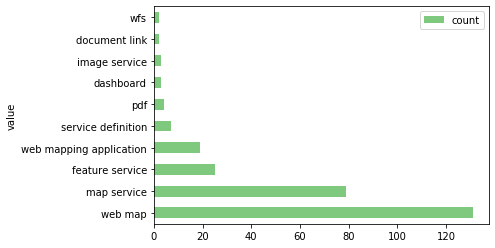

In [88]:
for c in stats['counts']:
    if c['fieldName'] == 'type':
        break
c
ax = (
    pd.DataFrame(c['fieldValues'])
     .reset_index()
     .plot(kind='barh', 
           #stacked=True, 
           y='count', 
           x='value', 
           #label='value',
           colormap='Accent')
);
